<a href="https://colab.research.google.com/github/jp7252/ML4RM/blob/main/Class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ROC Curve

- For multi-class classification problem, we used majority vote to decide which category the data point belongs to.
- In binary classification case, what is the most reasonable threshold to use when you decide whether a data point is positive or negative?
- When using different thresholds, the model will result in different sensitivity and specifity. Plotting the model performance under different thresholds gives us the [Receiver Operating Characteristic (ROC)](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) curve.
- In the ROC curve:
    - x-axis represents the False Positive Rate (FPR), which is 1-Specificity
    - y-axis represents the True Positive Rate (TPR) or Sensitivity.
- A good model will have an ROC curve that is closer to the top-left corner, indicating higher sensitivity (TPR) and specificity (TNR) across various threshold levels. The ideal point on the curve is (0, 1), representing perfect sensitivity (TPR) and no false positives (FPR).

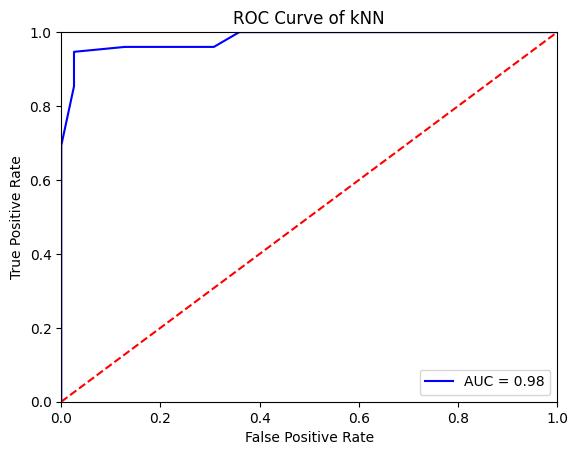

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [ ]:
threshold

array([inf, 1. , 0.9, 0.8, 0.6, 0.4, 0.3, 0.2, 0.1, 0. ])

## Regularized Regression: Ridge and Lasso


- The root cause of the high model variance is due to the appearance of multicollinearity among the data features.
- Intuitively the appearance of such hidden linear relationship makes our
model over-confident about what it learns in the data --- which can **NOT** be generalized to unseen new test sets.
- This suggests that as long as multicollinearity occurs, the linear
coefficients estimated by the normal equation can be larger (in magnitude) than the un-observed true model’s coefficients.

- Colinearity Example
  - Collect a dataset based on the coins in peoples pockets, the $y$ variable/response is the total value of the coins, the variable $x_1$ is the total number of coins and $x_2$ is the number of coins that are not quarters.
  - It is easy to see that the regression with either $x_1$ or $x_2$ would give a positive slope, but when incuding both in the model the slope on $x_2$ would go negative since increasing the number of smaller coins without increasing the total number of coins would mean replacing large coins with smaller ones and reducing the overall value (y).
  - If $x_1$ and $x_2$ are the same, $y=\beta_0+\beta_1*x_1+\beta_2*x_2+e$ and $y=\beta_0+(\beta_1+\beta_2)*x_1+0*x_2+e$ would be indistinguishable

### Lasso Regression

- The difference between regularized regression and normal linear regression is the cost function.
- Since the penality term is **NOT** a smooth function, there is no closed form solution to Lasso model's slope coefficients. We can use gradient to find the best weights

$$Cost = (y−X\beta)^T(y−X\beta)+\lambda|\beta|$$

- The $\lambda$ here controls how hard do we want to penalize the weights. The higher the value is, the more shrinkage it will receive.

### Ridge Regression

- We can see that the only difference between ridge and lasso is the regularization term.
  - $Cost = (y−X\beta)^T(y−X\beta)+\lambda\beta^T\beta$
  - Ridge uses L2 norm (squared) and Lasso uses L1 norm.


### Ridge vs Lasso

![alt](https://drive.google.com/uc?export=view&id=1oZB1tPSXdsovfT-7Atc_tB7WCbjhv5ie)

<center>Image from the ISLR book</center>

- A more intuitive visualization to understand why lasso works better for shrinkage [here](https://explained.ai/regularization/index.html)

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)
l_reg.coef_

array([  29.25401303, -261.7064691 ,  546.29972304,  388.39834056,
       -901.95966819,  506.76324136,  121.15435079,  288.03526689,
        659.26895081,   41.37670105])

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge.coef_

array([  45.05421022,  -71.94739737,  280.71625182,  195.21266175,
         -2.22930269,  -17.54079744, -148.68886188,  120.46723979,
        198.61440137,  106.93469215])

In [ ]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.coef_

array([  0.        ,  -0.        , 443.7033885 ,  51.60109433,
         0.        ,   0.        ,  -0.        ,   0.        ,
       201.96647823,   0.        ])

### Appendix

- Implementation of L1 Regularization

In [ ]:
class l1_regularization():
  """ Regularization for Lasso Regression """
  def __init__(self, alpha):
    self.alpha = alpha

  def __call__(self, w):
    return self.alpha * np.linalg.norm(w, 1)

  def grad(self, w):
    return self.alpha * np.sign(w)

- Implementation of L2 Regularization

In [ ]:
class l2_regularization():
  """ Regularization for Ridge Regression """
  def __init__(self, alpha):
    self.alpha = alpha

  def __call__(self, w):
    return self.alpha * w.T.dot(w)

  def grad(self, w):
    return self.alpha * w

- Creating the general regression class

In [ ]:
import math
import numpy as np

class Regression(object):
    """ Base regression model. Models the relationship between a scalar dependent variable y and the independent
    variables X.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, n_iterations, learning_rate):
      self.n_iterations = n_iterations
      self.learning_rate = learning_rate
      # Initialize the regularization as a placeholder
      self.regularization = lambda x: 0
      self.regularization.grad = lambda x: 0

    def initialize_weights(self, n_features):
      """ Initialize weights randomly [-1/p, 1/p] """
      limit = 1/math.sqrt(n_features)
      self.w = np.random.uniform(-limit, limit, (n_features, ))

    def fit(self, X, y):
      # Insert constant ones for bias weights
      X = np.insert(X, 0, 1, axis=1)
      # Initialize the weights
      self.initialize_weights(n_features=X.shape[1])

      # Perform gradient descent for n_iterations
      for i in range(self.n_iterations):
        y_pred = X.dot(self.w)
        # Calculate the loss
        mse = np.mean((y - y_pred)**2 + self.regularization(self.w))
        # Calculate the gradient
        grad_w = -2*(y-y_pred).dot(X) + self.regularization.grad(self.w)
        self.w -= self.learning_rate * grad_w


    # define a "coef" getter
    @property
    def coef(self):
      if self.w is None:
        raise AttributeError('The coefficients do not exist')
      return self.w[1:]

    # define a "intercept" getter
    @property
    def intercept(self):
      if self.w is None:
          raise AttributeError('The intercept does not exist')
      return self.w[0]


    def predict(self, X):
      # Check if the model has been fitted yet
      if self.w is None:
        raise AttributeError('You need to fit the model first before running the predictions')
      # Insert constant ones for bias weights
      X = np.insert(X, 0, 1, axis=1)
      y_pred = X.dot(self.w)

      return y_pred

- Ridge Regression Class

In [ ]:
class RidgeRegression(Regression):
    """Also referred to as Tikhonov regularization. Linear regression model with a regularization factor.
    Model that tries to balance the fit of the model with respect to the training data and the complexity
    of the model. A large regularization factor with decreases the variance of the model.
    Parameters:
    -----------
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, reg_factor, n_iterations=1000, learning_rate=0.001):
      super(RidgeRegression, self).__init__(n_iterations, learning_rate)
      self.regularization = l2_regularization(alpha=reg_factor)

- Lasso Regression Class

In [ ]:
class LassoRegression(Regression):
    """Linear regression model with a regularization factor which does both variable selection
    and regularization. Model that tries to balance the fit of the model with respect to the training
    data and the complexity of the model. A large regularization factor with decreases the variance of
    the model and do para.
    Parameters:
    -----------
    reg_factor: float
        The factor that will determine the amount of regularization and featureshrinkage.
    n_iterations: float
        The number of training iterations the algorithm will tune the weights for.
    learning_rate: float
        The step length that will be used when updating the weights.
    """
    def __init__(self, reg_factor, n_iterations=1000, learning_rate=0.001):
      super(LassoRegression, self).__init__(n_iterations, learning_rate)
      self.regularization = l1_regularization(alpha=reg_factor)